In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
data = pd.read_csv("instagram_reach.csv")

In [3]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
#because there is only 6 main features (columns), "Unnamed:0" and "S.No" columns will removed
df2 = data.copy()
df2.drop(['Unnamed: 0','S.No'], inplace=True,axis=1)

In [5]:
df2.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [6]:
#only Caption column that has missing values so missing values will be dropped
df2=df2.dropna()

In [7]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in df2['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df2.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df2['Times since posted (hours)'] = se.values
df2['Times since posted (hours)'] = pd.to_numeric(df2['Times since posted (hours)'])
df2 = df2.drop('Time since posted', axis=1)

In [8]:
#check new data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Username                    94 non-null     object
 1   Caption                     94 non-null     object
 2   Followers                   94 non-null     int64 
 3   Hashtags                    94 non-null     object
 4   Likes                       94 non-null     int64 
 5   Times since posted (hours)  94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


In [9]:
data.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [10]:
df2.columns

Index(['Username', 'Caption', 'Followers', 'Hashtags', 'Likes',
       'Times since posted (hours)'],
      dtype='object')

In [11]:
# !pip install wordcloud

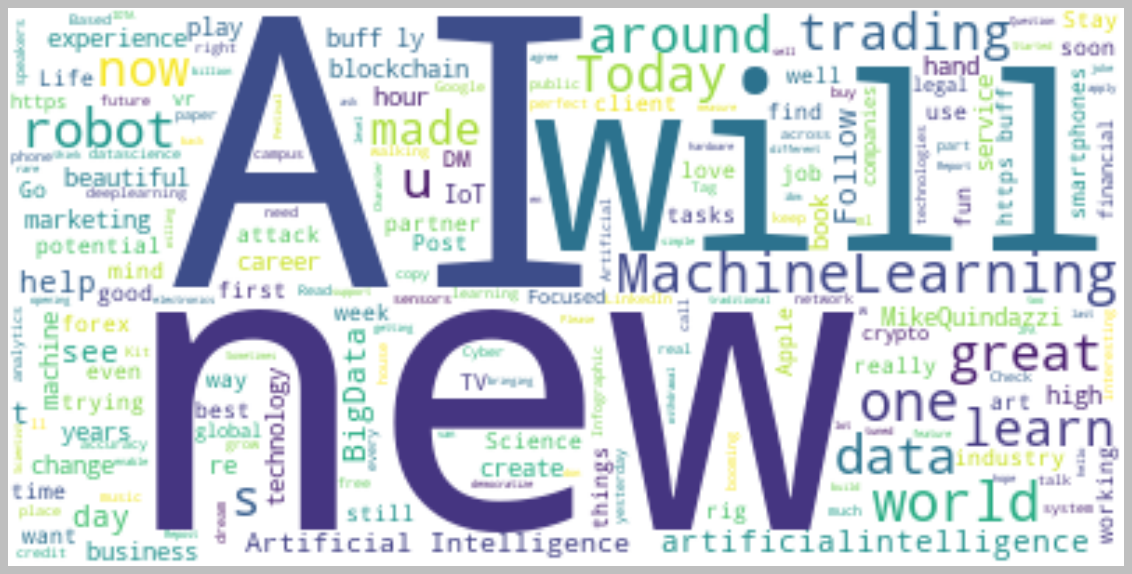

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(i for i in df2.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

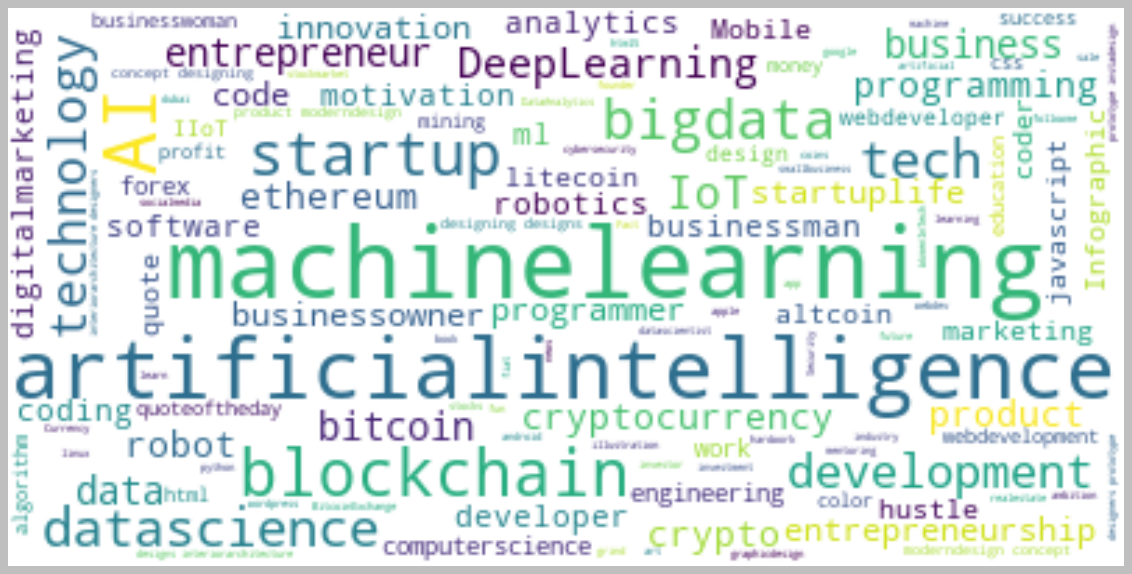

In [13]:
text = " ".join(i for i in df2.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

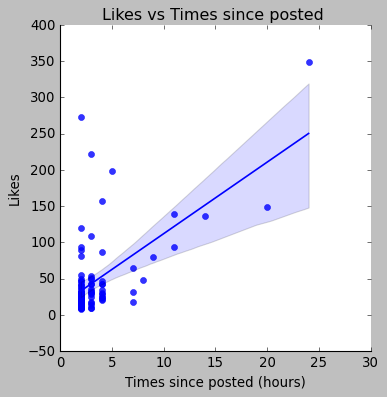

In [14]:
import seaborn as sns

sns.lmplot(x='Times since posted (hours)', y='Likes', data=df2, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

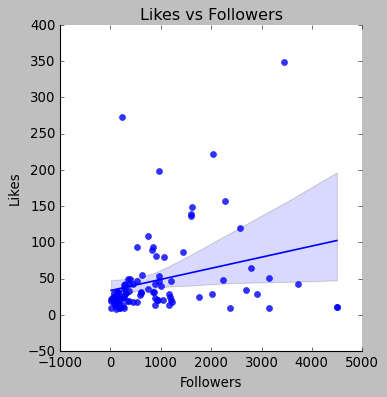

In [15]:
sns.lmplot(x='Followers', y='Likes', data=df2, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

C:\Users\Shobhandeb\AppData\Local\Temp\ipykernel_19708\889289877.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)


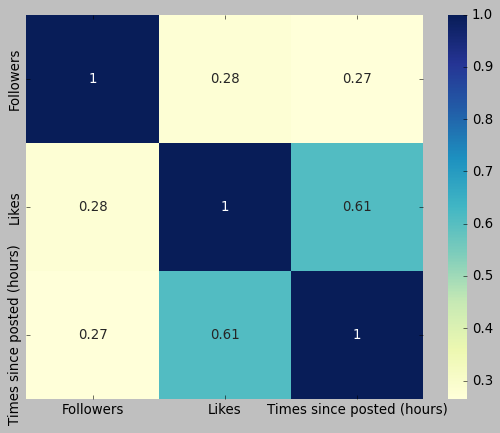

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [17]:
#Define x variables and y variable
x = df2[['Followers', 'Times since posted (hours)']]
y_likes = df2['Likes']
y_time_since_posted = df2['Times since posted (hours)']  # Target variable for time since posted

# Split the data into training and testing sets
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(x, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [18]:
X_train

,Followers,Times since posted (hours)
66,151,2
15,971,3
70,1200,2
82,845,2
30,828,2
...,...,...
61,11,3
74,740,2
14,2904,3
98,2039,3


In [20]:
y_time_train

66    2
15    3
70    2
82    2
30    2
     ..
61    3
74    2
14    3
98    3
51    4
Name: Times since posted (hours), Length: 75, dtype: int64

In [21]:
# !pip install xgboost

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

#Fit the model and predict the value of test set
likes_model = XGBRegressor()
likes_model.fit(X_train, y_likes_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

NameError: name 'model' is not defined

In [25]:
# Create and train the model for predicting time since posted
time_model = XGBRegressor()
time_model.fit(X_train, y_time_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
# Make predictions on the test set
likes_predictions = likes_model.predict(X_test)
time_predictions = time_model.predict(X_test)

In [27]:
# Evaluate the model (optional)
likes_score = likes_model.score(X_test, y_likes_test)
time_score = time_model.score(X_test, y_time_test)

In [28]:
# Print the evaluation scores (optional)
print("Likes Prediction Score:", likes_score)
print("Time Since Posted Prediction Score:", time_score)

Likes Prediction Score: 0.41125702564736255
Time Since Posted Prediction Score: 0.9525539567480856
